Name - Gaurav Singh

Data Science & Analytics Intern @Spark Foundation

# Task-6 : Prediction using Decision Tree Algorithm

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the dataset
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
df.drop("Id" , axis = 1 , inplace = True )

In [8]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Text(0, 0.5, 'SepalWidthCm')

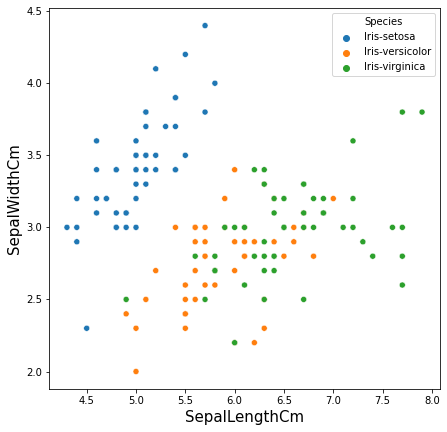

In [9]:
# Plotting the scatterplot b/w sepal width and sepal length
plt.figure(figsize = (7,7))
sns.scatterplot(x = 'SepalLengthCm' , y = 'SepalWidthCm' , data = df , hue = 'Species')
plt.xlabel('SepalLengthCm',fontsize = 15)
plt.ylabel('SepalWidthCm',fontsize = 15)

Text(0, 0.5, 'PetalWidthCm')

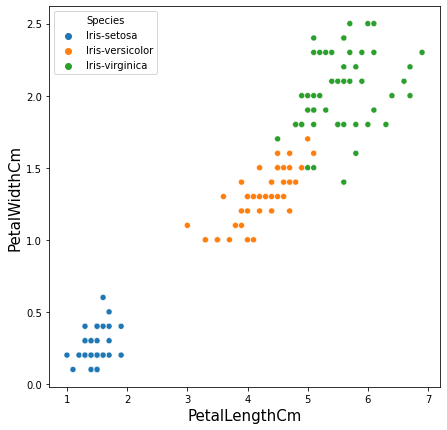

In [10]:
# Plotting the scatterplot b/w petal width and petal length
plt.figure(figsize = (7,7))
sns.scatterplot(x = 'PetalLengthCm' , y = 'PetalWidthCm' , data = df , hue = 'Species')
plt.xlabel('PetalLengthCm',fontsize = 15)
plt.ylabel('PetalWidthCm',fontsize = 15)

<Figure size 576x720 with 0 Axes>

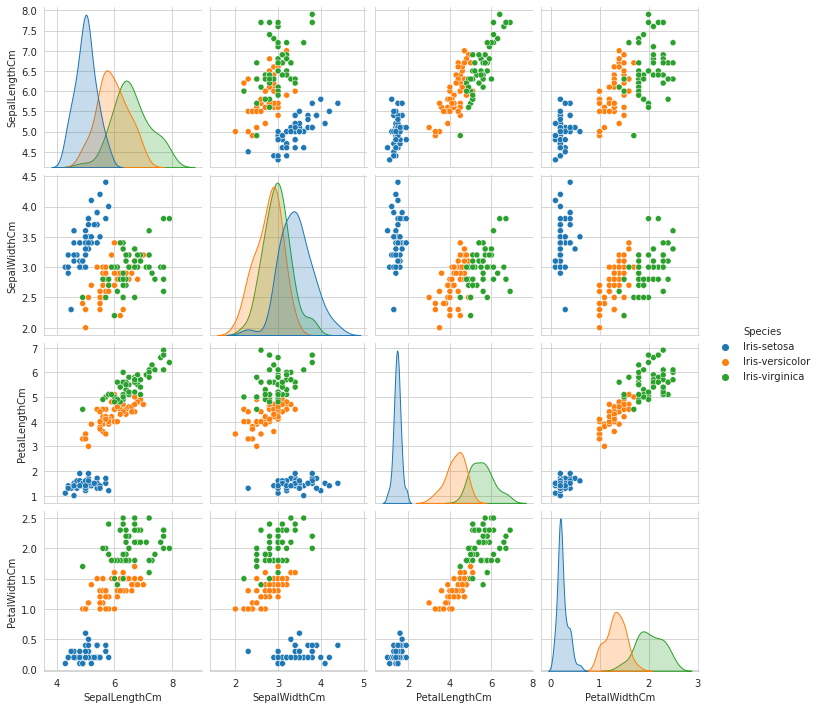

In [11]:
#pairplot
plt.figure(figsize = (8,10))
sns.set_style('whitegrid')
sns.pairplot(data = df , hue = 'Species')

In [13]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Species'] = label.fit_transform(df['Species'])

In [14]:
df['Species'].unique()

array([0, 1, 2])

In [16]:
#Train and Test
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [17]:
#Spliting Training and Test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


In [18]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
std_scl = StandardScaler()
X_train = std_scl.fit_transform(X_train)
X_test = std_scl.transform(X_test)
print(X_train)

[[-1.02366372 -2.37846268 -0.18295039 -0.29145882]
 [ 0.69517462 -0.10190314  0.93066067  0.73721938]
 [ 0.92435306  0.58106472  1.04202177  1.6373128 ]
 [ 0.1222285  -1.92315077  0.6522579   0.35146505]
 [ 0.92435306 -1.24018291  1.09770233  0.73721938]
 [-0.33612839 -1.24018291  0.03977182 -0.16287405]
 [ 2.07024529 -0.10190314  1.26474398  1.38014325]
 [ 0.46599617  0.58106472  0.48521625  0.48004983]
 [-0.45071761 -1.46783886 -0.01590873 -0.16287405]
 [ 0.46599617 -0.784871    0.59657735  0.73721938]
 [ 0.46599617 -0.55721505  0.70793846  0.35146505]
 [-1.13825295 -1.24018291  0.37385514  0.6086346 ]
 [ 0.46599617 -1.24018291  0.6522579   0.86580415]
 [ 1.26812073  0.35340877  0.48521625  0.22288028]
 [ 0.69517462 -0.10190314  0.76361901  0.99438893]
 [ 0.1222285   0.80872067  0.37385514  0.48004983]
 [-1.25284217  0.12575281 -1.24088089 -1.32013702]
 [-0.10694994 -0.784871    0.70793846  0.86580415]
 [-0.33612839 -0.784871    0.20681348  0.0942955 ]
 [-0.33612839 -0.32955909 -0.12

In [19]:
#Creating the Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
classifier = tree.DecisionTreeClassifier(criterion='entropy' , random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [20]:
y_pred = classifier.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [21]:
#EVALUATION
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_test, y_pred)
print(conf)
accuracy_score(y_test, y_pred)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


0.9777777777777777

In [22]:
feature_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm)']
class_names=['setosa','versicolor','virginica']


[Text(334.8, 489.24, 'PetalWidthCm) <= -0.613\nentropy = 1.58\nsamples = 105\nvalue = [34, 32, 39]\nclass = virginica'),
 Text(251.10000000000002, 380.52000000000004, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = setosa'),
 Text(418.5, 380.52000000000004, 'PetalLengthCm <= 0.624\nentropy = 0.993\nsamples = 71\nvalue = [0, 32, 39]\nclass = virginica'),
 Text(167.4, 271.8, 'PetalWidthCm) <= 0.544\nentropy = 0.431\nsamples = 34\nvalue = [0, 31, 3]\nclass = versicolor'),
 Text(83.7, 163.08000000000004, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = versicolor'),
 Text(251.10000000000002, 163.08000000000004, 'SepalWidthCm <= 0.126\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(167.4, 54.360000000000014, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(334.8, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(669.6, 271.8, 'PetalWidthCm) <= 0.673\nentropy = 0.179\nsampl

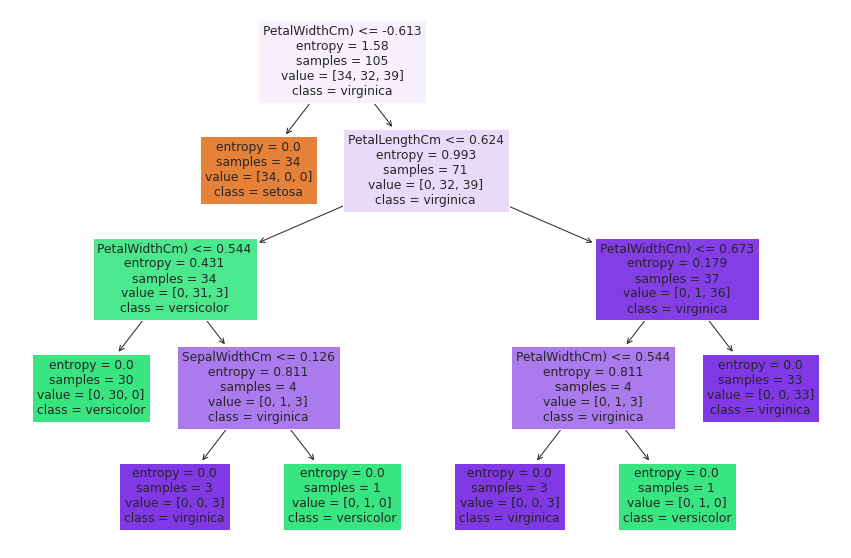

In [23]:
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,feature_names = feature_names,class_names= class_names,filled=True)